In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

#Carregar o dataset "Cats vs Dogs"
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,
)

In [2]:
#Preprocessamento dos dados
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.image.resize(image, IMG_SIZE) / 255.0
    return image, label

train_ds = train_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [3]:
#Criar um modelo baseado no vgg16
base_model = vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar camadas para evitar re-treinamento

# Criar novas camadas personalizadas
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")  # Apenas 2 classes (gato ou cachorro)
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Compilar o modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [5]:
#Treinar o modelo
model.fit(train_ds, validation_data=validation_ds, epochs=8)

Epoch 1/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 91s 265ms/step - accuracy: 0.7709 - loss: 0.4809 - val_accuracy: 0.8994 - val_loss: 0.2528
Epoch 2/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 120s 231ms/step - accuracy: 0.9022 - loss: 0.2467 - val_accuracy: 0.9084 - val_loss: 0.2264
Epoch 3/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 73s 200ms/step - accuracy: 0.9119 - loss: 0.2156 - val_accuracy: 0.9119 - val_loss: 0.2183
Epoch 4/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 58s 198ms/step - accuracy: 0.9186 - loss: 0.1989 - val_accuracy: 0.9114 - val_loss: 0.2215
Epoch 5/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 58s 200ms/step - accuracy: 0.9192 - loss: 0.1897 - val_accuracy: 0.9106 - val_loss: 0.2194
Epoch 6/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 67s 230ms/step - accuracy: 0.9214 - loss: 0.1818 - val_accuracy: 0.9166 - val_loss: 0.2032
Epoch 7/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 74s 201ms/step - accuracy: 0.9269 - loss: 0.1735 - val_accuracy: 0.9166 - val_loss: 0.2034
Epoch 8/8
291/291 ━━━━━━━━━━━━━━━━━━━━ 58s 198ms/step - accuracy: 0.9261 - loss: 0.1720 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


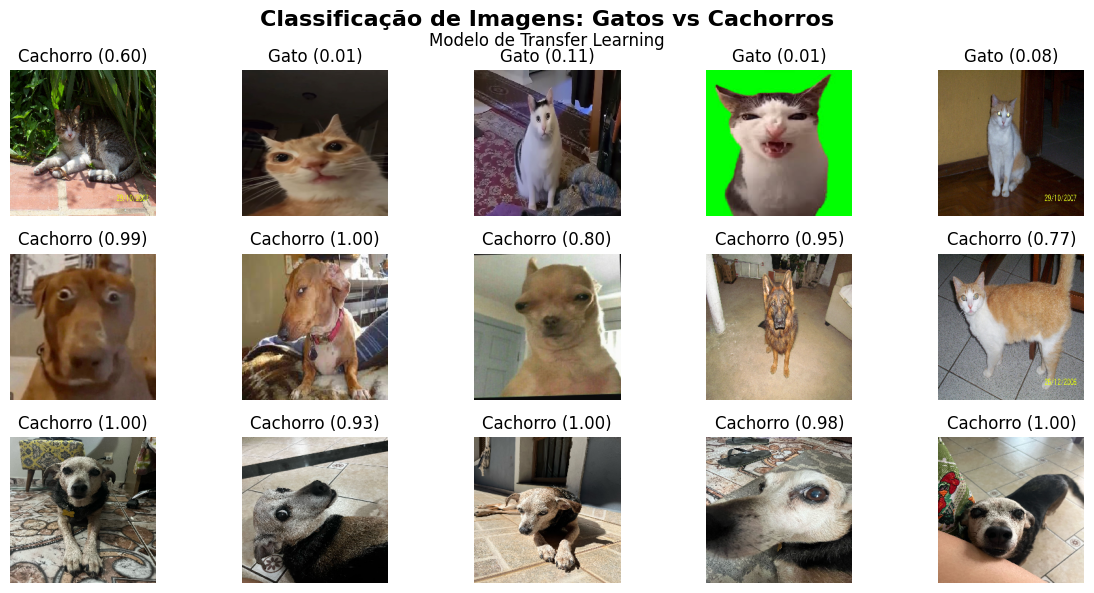

In [27]:
# Lista de imagens
img_paths = ["xadrez.jpeg", "cat2.jpg", "cat3.jpg", "cat4.jpeg", "miu2.jpeg",
             "dog.jpg", "dog2.jpeg", "dog3.jpg", "nubi.JPG", "miu.jpeg",
             "suki.jpeg", "suki2.jpeg", "suki3.jpeg", "suki4.jpeg", "suki5.jpeg"

             ]
labels = []

# Criar a figura com 2 linhas e 5 colunas
fig, axes = plt.subplots(3, 5, figsize=(12, 6))

# Adicionar título e subtítulo
plt.suptitle("Classificação de Imagens: Gatos vs Cachorros", fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.92, "Modelo de Transfer Learning", fontsize=12, ha="center")


for i, img_path in enumerate(img_paths):
    # Carregar e preprocessar a imagem
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)

    # Fazer a predição
    prediction = model.predict(x)[0][0]
    label = "Cachorro" if prediction > 0.5 else "Gato"
    label_with_score = f"{label} ({prediction:.2f})"  # Formatar com 2 casas decimais
    labels.append(label_with_score)

    # Acessar a posição correta na matriz de subplots
    row, col = divmod(i, 5)  # Divide por 5 para organizar em 2 linhas e 5 colunas
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(label_with_score)  # Exibir o label com o score

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()
